In [1]:
import random
from matplotlib import pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
def synthetic_data(w, b, num_examples):
    """y = Xw + b + bruit."""

    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [42]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features the first 10 rows:-----------------', features[:10,:])
print('\n labels the first 10 rows:----------------', labels[:10])

features the first 10 rows:----------------- tf.Tensor(
[[ 0.33342862  0.21189825]
 [ 1.0233953   2.5911472 ]
 [ 1.350071   -0.71512973]
 [-2.477302   -0.83432883]
 [-0.47611785  1.099458  ]
 [-0.35383603 -2.3016589 ]
 [ 1.6232338   0.8249778 ]
 [ 0.5677798   0.96275324]
 [-1.1644211  -2.089547  ]
 [ 0.9931598   0.88324183]], shape=(10, 2), dtype=float32)

 labels the first 10 rows:---------------- tf.Tensor(
[[ 4.127249 ]
 [-2.5767853]
 [ 9.325061 ]
 [ 2.0784285]
 [-0.4974504]
 [11.31782  ]
 [ 4.643217 ]
 [ 2.0771592]
 [ 8.9747925]
 [ 3.1741357]], shape=(10, 1), dtype=float32)


In [7]:
features.shape, labels.shape

(TensorShape([1000, 2]), TensorShape([1000, 1]))

Text(0, 0.5, 'y')

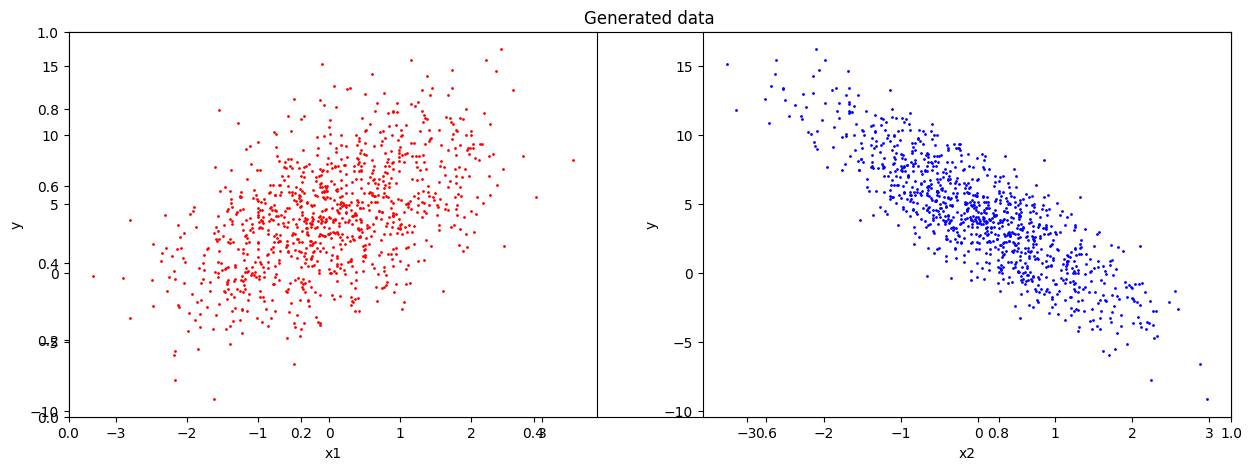

In [17]:
plt.figure(figsize=(15, 5))
plt.title('Generated data')

plt.subplot(1, 2, 1)
plt.scatter(features[:,0].numpy(), labels.numpy(), 1, color='r')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1, color='b')
plt.xlabel('x2')
plt.ylabel('y')



In [18]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [19]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print('X',X, '\n','y', y)
    break

X tf.Tensor(
[[ 1.7843955   0.9249694 ]
 [-0.37265876  1.3649932 ]
 [-1.5638727   0.3059311 ]
 [-1.1064736  -2.1095166 ]
 [-0.7923518   0.31331328]
 [-1.2327782  -1.2148806 ]
 [ 0.4043816  -0.83804965]
 [-1.3373622   0.615626  ]
 [ 1.5711254  -0.5590135 ]
 [-1.2170163   0.700207  ]], shape=(10, 2), dtype=float32) 
 y tf.Tensor(
[[ 4.613448  ]
 [-1.1906477 ]
 [ 0.03219349]
 [ 9.171633  ]
 [ 1.533451  ]
 [ 5.857433  ]
 [ 7.8558593 ]
 [-0.5612257 ]
 [ 9.242345  ]
 [-0.6070982 ]], shape=(10, 1), dtype=float32)


# Model

In [20]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [21]:
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2

def sgd(params, grads, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [24]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)

        dw, db = g.gradient(l, [w, b])

        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')#

epoch 1, loss 0.039441
epoch 2, loss 0.000144
epoch 3, loss 0.000048


In [25]:
print(f'w error: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b error: {true_b - b}')

w error: [-0.00014639  0.0001471 ]
b error: [0.00048923]


## Exercices


1. Pourquoi la fonction "reshape" est-elle nécessaire dans la fonction "squared_loss" ?

1. Expérimentez en utilisant différents taux d'apprentissage pour découvrir à quelle vitesse la valeur de la fonction de perte chute. Faites de même pour le nombre d'itérations.

1. Si le nombre d'exemples ne peut pas être divisé par la taille du lot, qu'arrive-t-il au comportement de la fonction `data_iter` ?

1. Re-tester l'exemple du Lab01 avec ce programme


1. La fonction reshape est nécessaire pour garantir que y a la même forme que y_hat, ce qui permet une soustraction élément par élément correcte sans erreur de diffusion (broadcasting) inattendue.

2.

In [28]:
lr = 0.1
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)

        dw, db = g.gradient(l, [w, b])

        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')#
print(f'w error: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b error: {true_b - b}')

epoch 1, loss 0.000047
epoch 2, loss 0.000048
epoch 3, loss 0.000048
w error: [0.00124443 0.00032067]
b error: [-0.00023746]


In [29]:
lr = 0.001
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)

        dw, db = g.gradient(l, [w, b])

        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')#
print(f'w error: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b error: {true_b - b}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
w error: [0.00093019 0.00046659]
b error: [-0.00017452]


In [30]:
lr = 0.2
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)

        dw, db = g.gradient(l, [w, b])

        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')#
print(f'w error: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b error: {true_b - b}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000049
w error: [0.00025153 0.00288439]
b error: [0.00021076]


3. La fonction data_iter gère cela correctement.

Le dernier lot sera simplement plus petit que la taille de lot spécifiée (batch_size), car elle utilise min(i + batch_size, num_examples) pour éviter de dépasser les indices disponibles.

4.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Deep Learning/Linear NN/Loyers.csv")


In [47]:
features_new = dataset["surface"]
labels_new = dataset["loyer"]
# to numpy
features_new = features_new.to_numpy()
labels_new = labels_new.to_numpy()


In [51]:
eatures_new = dataset['surface']
labels_new = dataset['loyer']

# Convert to TensorFlow tensors and cast to float32
features_new_tf = tf.cast(features_new, tf.float32)
labels_new_tf = tf.cast(labels_new, tf.float32)

# Calculate min and max for features and labels for normalization
feature_min = tf.reduce_min(features_new_tf)
feature_max = tf.reduce_max(features_new_tf)
label_min = tf.reduce_min(labels_new_tf)
label_max = tf.reduce_max(labels_new_tf)

# Normalize features and labels to the range [0, 1]
features_normalized = (features_new_tf - feature_min) / (feature_max - feature_min)
labels_normalized = (labels_new_tf - label_min) / (label_max - label_min)


# Re-initialize w and b for a single feature model
w = tf.Variable(tf.random.normal(shape=(1, 1), mean=0, stddev=0.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

lr = 0.0001 # Reduced learning rate
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # Use the normalized features and labels for training
    for X, y in data_iter(batch_size, features_normalized, labels_normalized):
        with tf.GradientTape() as g:
            # Reshape X to be 2D (batch_size, 1) for matrix multiplication
            l = loss(net(tf.reshape(X, (-1, 1)), w, b), y)

        dw, db = g.gradient(l, [w, b])

        sgd([w, b], [dw, db], lr, batch_size)
    # Use the normalized features and labels for calculating training loss
    train_l = loss(net(tf.reshape(features_normalized, (-1, 1)), w, b), labels_normalized)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.007068
epoch 2, loss 0.007035
epoch 3, loss 0.007002
